# Implementation 2 of Estimating the ACov and ACor

- See the problem statement with notes at [2.4-mainWithGoalAndNotes.ipynb](https://github.com/Brinkley97/book-forecasting_and_control/blob/main/part_1/2-autocorrelation_func_and_spectrum_of_stationary_process/exercises/2.4-mainWithGoalAndNotes.ipynb)

- See implementation 1 at [2.4.1-withDarian.ipynb](https://github.com/Brinkley97/book-forecasting_and_control/blob/main/part_1/2-autocorrelation_func_and_spectrum_of_stationary_process/exercises/2.4.1-withDarian.ipynb)

# TODOs

- [x] Imports + Load Data

- [x] (2.1.12) **Estimate the ACov @ lag k :** $ \hat{\gamma}_{k} $ (gamma hat) = 1/N * $ \sum_{t=1}^{N - k} (z_{t} - \bar{z})(z_{t+k} - \bar{z}) $ k = 0, 1, 2,..., K

- [x] (2.1.12) Set : $ c_k $ = $ \hat{\gamma}_{k} $

- [x] (2.1.11) **Estimate the ACor @ lag k :** $ \hat{\rho}{_k} $ (rho hat) = $ c_k $ / $ c_0 $

- [x] (2.1.11) Set : $ r_k $ to  $ \hat{\rho}{_k} $

- [x] Verify with [LEW dataset](https://www.itl.nist.gov/div898/handbook/eda/section3/eda35c.htm)

- [x] Graph $ r_k $



## Imports + Load Data

In [18]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

In [2]:
BASE = '/Users/brinkley97/Documents/development/'
path_to_datasets = 'book-forecasting_and_control_by_4_Gs/datasets/'

In [3]:
# lew
lew_dataset_file = "lewDataset.csv"
lew_dataset = BASE + path_to_datasets + lew_dataset_file

In [4]:
irvine_blood_sugar_dataset = "irvinePrePostMeals.csv"
irvine_pre_post_meals = BASE + path_to_datasets + irvine_blood_sugar_dataset

In [5]:
book_dataset = [200, 202, 208, 204, 204, 207, 207, 204, 202, 199, 201, 198, 200, 
        202, 203, 205, 207, 211, 204, 206, 203, 203, 201, 198, 200, 206, 
        207, 206, 200, 203, 203, 200, 200, 195, 202, 204, 207, 206, 200]

In [6]:
def basic_stats(path_to_data):
    """
    
    Parameter:
    path_to_data -- py list or pd DF (of the data)
    
    Return
    z, N, lags_range, mean_of_data -- py tuple (of the data, lenght of data, range of lag values, mean of the data)
    """
    
    print(type(path_to_data))
    
    type_is_list = isinstance(path_to_data, list)
    
    if type_is_list == False:
        data = pd.read_csv(path_to_data)
        if len(data.columns) == 1: 
            z = data.iloc[0:, 0]
        elif len(data.columns) == 2: 
            z = data.iloc[0:, 1]
        else:
            print("Check #columns")
            print(data)
    else:
        z = path_to_data
        
    N = len(z)
    lags_range = range(0, N)
    mean_of_data = np.mean(z)
    
    return z, N, lags_range, mean_of_data

In [7]:
z, N, ks, zbar = basic_stats(lew_dataset)
# z, N, ks, zbar = basic_stats(irvine_pre_post_meals)
# z, N, ks, zbar = basic_stats(book_dataset)

<class 'str'>


In [8]:
z
# N
# ks
# zbar

0     -213
1     -564
2      -35
3      -15
4      141
      ... 
195   -385
196    198
197   -218
198   -536
199     96
Name: measurements, Length: 200, dtype: int64

## Estimate AutoCov @ lag k

In [10]:
def est_autocov(data, len_of_data, lag_k, sample_mean): 
    """Calculate the estimated autocovariance
    
    Parameters:
    data -- py int (of numerical values in data)
    len_of_data -- py int (of the data length)
    lag_k -- py list (of k values)
    sample_mean -- py float (of the mean of the data)
    
    Return:
    a list of tuples (ck idex, ck float value)
    
    """
    
    gamma_k = 0
    
    for t in range(len_of_data - lag_k):
        # print(t, lag_k)
        # when we have a new index of lag_k, hence 0, 1, ..., K
        t_sm = (data[t] - sample_mean)
        # print(t_sm)
        tk_sm = data[t + lag_k] - sample_mean
        # print(tk_sm)
        gamma_k += t_sm * tk_sm
        # print(gamma_k)
        # print()
        
        # print("gamma_k : ", gamma_k)
    return lag_k, gamma_k/N

In [11]:
c_ks = []

for i in range(len(ks)): 
    c_ks.append(est_autocov(z, N, ks[i], zbar))
    
c_ks

[(0, 76528.56577500004),
 (1, -23517.595646125),
 (2, -56657.944042250005),
 (3, 59285.855336625),
 (4, 15700.251415500008),
 (5, -68734.59878062503),
 (6, 28779.622398249987),
 (7, 48430.83590212498),
 (8, -58870.063744),
 (9, -9556.184915124997),
 (10, 63098.80773875),
 (11, -30644.598357374998),
 (12, -41808.83645349999),
 (13, 55982.608025375),
 (14, 5462.814454249996),
 (15, -57880.60436687498),
 (16, 30771.480036999994),
 (17, 36876.433015874994),
 (18, -53237.202280250014),
 (19, -2545.668876374998),
 (20, 53609.00165249999),
 (21, -31363.055518625006),
 (22, -32881.37568975001),
 (23, 51287.719164124996),
 (24, -48.40695700000298),
 (25, -50381.45885312501),
 (26, 31790.64832575),
 (27, 29733.49325462501),
 (28, -50070.91021650001),
 (29, 2004.9606623749976),
 (30, 48143.22476624997),
 (31, -32262.69242987499),
 (32, -27316.240651000004),
 (33, 49026.011477875),
 (34, -4012.3941932500006),
 (35, -45995.155439375005),
 (36, 33150.225189499964),
 (37, 24618.676343375),
 (38, -486

## Estimate AutoCor @ lag k

In [16]:
def est_autocor(data, N, lag_k, sample_mean):
    """Calculate the estimated autocorrelation
    
    Parameters:
    data -- py int (of numerical values in data)
    len_of_data -- py int (of the data length)
    lag_k -- py list (of k values)
    sample_mean -- py float (of the mean of the data)
    
    Functions:
    est_autocov
    
    Return:
    a list of tuples (ck idex, ck float value)
    
    """
    
    c_k = est_autocov(data, N, lag_k, sample_mean)
    # print("\nc_k : ", c_k[1])
    
    cnot = est_autocov(data, N, 0, sample_mean)
    # print("cnot : ", cnot[1])
    
    rho_hat_k = np.divide(c_k[1], cnot[1])
    # print("rho_hat_k : ", rho_hat_k)
    
    return lag_k, np.round(rho_hat_k, 2)

In [17]:
r_ks = []

for k in range(len(ks)):
    # print("k : ", k)
    r_ks.append(est_autocor(z, N, k, zbar))
r_ks

[(0, 1.0),
 (1, -0.31),
 (2, -0.74),
 (3, 0.77),
 (4, 0.21),
 (5, -0.9),
 (6, 0.38),
 (7, 0.63),
 (8, -0.77),
 (9, -0.12),
 (10, 0.82),
 (11, -0.4),
 (12, -0.55),
 (13, 0.73),
 (14, 0.07),
 (15, -0.76),
 (16, 0.4),
 (17, 0.48),
 (18, -0.7),
 (19, -0.03),
 (20, 0.7),
 (21, -0.41),
 (22, -0.43),
 (23, 0.67),
 (24, -0.0),
 (25, -0.66),
 (26, 0.42),
 (27, 0.39),
 (28, -0.65),
 (29, 0.03),
 (30, 0.63),
 (31, -0.42),
 (32, -0.36),
 (33, 0.64),
 (34, -0.05),
 (35, -0.6),
 (36, 0.43),
 (37, 0.32),
 (38, -0.64),
 (39, 0.08),
 (40, 0.58),
 (41, -0.45),
 (42, -0.28),
 (43, 0.62),
 (44, -0.1),
 (45, -0.55),
 (46, 0.45),
 (47, 0.25),
 (48, -0.61),
 (49, 0.14),
 (50, 0.51),
 (51, -0.46),
 (52, -0.21),
 (53, 0.58),
 (54, -0.16),
 (55, -0.47),
 (56, 0.45),
 (57, 0.17),
 (58, -0.55),
 (59, 0.18),
 (60, 0.43),
 (61, -0.45),
 (62, -0.14),
 (63, 0.53),
 (64, -0.19),
 (65, -0.41),
 (66, 0.45),
 (67, 0.12),
 (68, -0.52),
 (69, 0.2),
 (70, 0.39),
 (71, -0.44),
 (72, -0.11),
 (73, 0.5),
 (74, -0.21),
 (75, -0

# Graph AutoCor

In [19]:
def line_plot(x, y):
    fig, ax = plt.subplots()
    ax.plot(x, y, linewidth=3.0)

In [20]:
def autocor_plot(x, y, max_lags):
    fig, [ax1, ax2] = plt.subplots(2, 1)
    ax1.xcorr(x, y, maxlags=ks[max_lags], usevlines = True, normed = True, lw=2)
    ax1.grid(True)

    # ks x-axis; pho_k = -pho_k
    ax2.acorr(y, maxlags=ks[max_lags], usevlines = True, normed = True, lw=2)
    ax2.grid(True)
    
    # plt.title("Autocorrelation")
    plt.xlabel('k Lags')
    
    plt.ylabel('Autocorrelation')
    
    plt.xlim([0, max_lags])


In [21]:
def graph_est_autocor(x, y, r_ks, len_rks):
    
    max_lags = 10
    
    for idx in range(len_rks):
        x.append(r_ks[idx][0])
        # print("x : ", x)
        y.append(r_ks[idx][1])
        # print("y : ", y, "\n")    
    
    return line_plot(x, y), autocor_plot(x, y, max_lags)

(None, None)

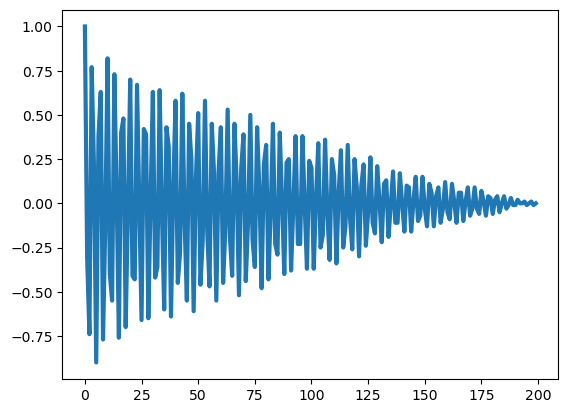

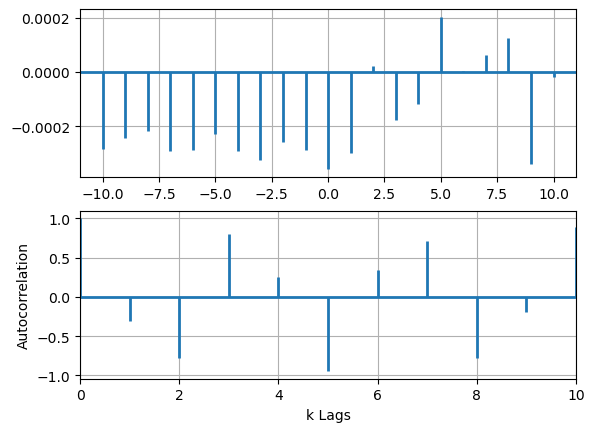

In [22]:
lags = []
autocor = []
len_rks = len(r_ks)
graph_est_autocor(lags, autocor, r_ks, len_rks)